In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [66]:
from google.colab import files
import pandas as pd

# Charger le fichier depuis ton PC
uploaded = files.upload()

# Lire le fichier CSV (remplace 'rendement_mais.csv' par le bon nom si nécessaire)
data = pd.read_csv(next(iter(uploaded)))


Saving rendement_mais.csv to rendement_mais (5).csv


In [67]:
# Afficher les premières lignes
data.head()

,SURFACE_HA,TYPE_SOL,ENGRAIS_KG_HA,PRECIPITATIONS_MM,TEMPERATURE_C,RENDEMENT_T_HA
0,7,Limoneux,56,124,21,10.759827
1,4,Limoneux,144,97,28,5.824879
2,8,Limoneux,157,81,21,7.842204
3,5,Argileux,123,106,17,10.560973
4,7,Sableux,88,149,20,11.905060


In [68]:
# Calcul des mesures de tendance centrale
mean_rendement = data['RENDEMENT_T_HA'].mean()
median_rendement = data['RENDEMENT_T_HA'].median()
mode_rendement = data['RENDEMENT_T_HA'].mode()[0] if not data['RENDEMENT_T_HA'].mode().empty else 'Pas de mode'
print(f"Moyenne: {mean_rendement}, Médiane: {median_rendement}, Mode: {mode_rendement}")
# Calcul des mesures de tendance centrale pour les précipitations
mean_precipitations = data['PRECIPITATIONS_MM'].mean()
median_precipitations = data['PRECIPITATIONS_MM'].median()
mode_precipitations = data['PRECIPITATIONS_MM'].mode()[0] if not data['PRECIPITATIONS_MM'].mode().empty else 'Pas de mode'
print(f"Précipitations - Moyenne: {mean_precipitations}, Médiane: {median_precipitations}, Mode: {mode_precipitations}")

# Calcul des mesures de tendance centrale pour la température
mean_temperature = data['TEMPERATURE_C'].mean()
median_temperature = data['TEMPERATURE_C'].median()
mode_temperature = data['TEMPERATURE_C'].mode()[0] if not data['TEMPERATURE_C'].mode().empty else 'Pas de mode'
print(f"Température - Moyenne: {mean_temperature}, Médiane: {median_temperature}, Mode: {mode_temperature}")

Moyenne: 7.378418687218944, Médiane: 7.349138167259971, Mode: 3.000276469608442
Précipitations - Moyenne: 99.693, Médiane: 100.0, Mode: 62
Température - Moyenne: 22.154, Médiane: 22.0, Mode: 25


In [69]:
# Calcul des mesures de dispersion
std_rendement = data['RENDEMENT_T_HA'].std()
var_rendement = data['RENDEMENT_T_HA'].var()
range_rendement = data['RENDEMENT_T_HA'].max() - data['RENDEMENT_T_HA'].min()
print(f"Écart-type: {std_rendement}, Variance: {var_rendement}, Étendue: {range_rendement}")


Écart-type: 2.5699909853267067, Variance: 6.604853664660536, Étendue: 8.995742859645505


(0.0, 40.0)

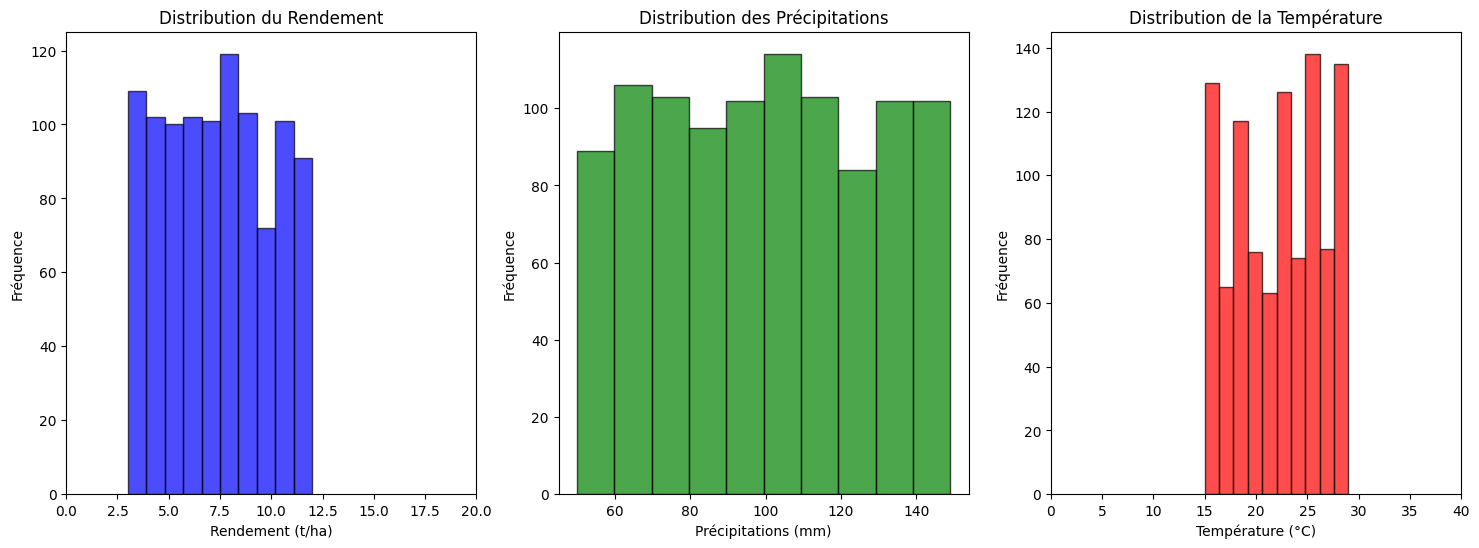

In [70]:
# Visualisation des histogrammes
plt.figure(figsize=(18, 6))

# Histogramme du rendement
plt.subplot(1, 3, 1)
plt.hist(data['RENDEMENT_T_HA'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Rendement (t/ha)')
plt.ylabel('Fréquence')
plt.title('Distribution du Rendement')
plt.xlim(0, 20)  # Limiter l'axe des x de 0 à 20 pour le rendement

# Histogramme des précipitations
plt.subplot(1, 3, 2)
plt.hist(data['PRECIPITATIONS_MM'], bins=10, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Précipitations (mm)')
plt.ylabel('Fréquence')
plt.title('Distribution des Précipitations')

# Histogramme de la température
plt.subplot(1, 3, 3)
plt.hist(data['TEMPERATURE_C'], bins=10, color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Température (°C)')
plt.ylabel('Fréquence')
plt.title('Distribution de la Température')
plt.xlim(0, 40)  # Limiter l'axe des x de 0 à 40°C

(0.0, 40.0)

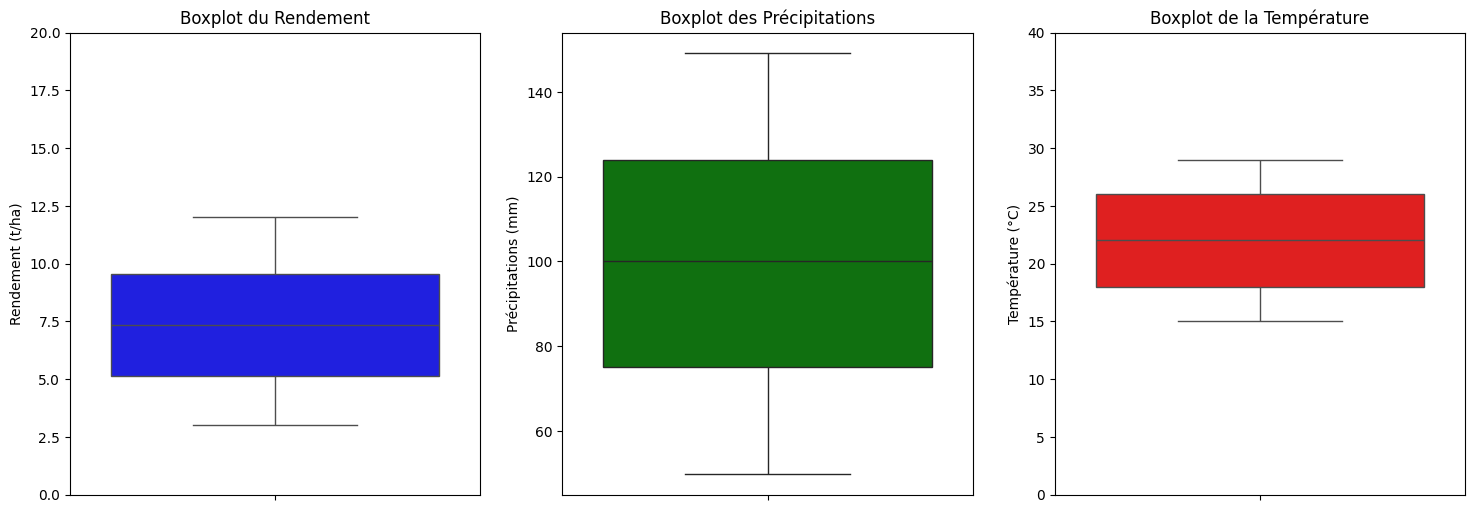

In [71]:
# Visualisation des boxplots
plt.figure(figsize=(18, 6))

# Boxplot du rendement
plt.subplot(1, 3, 1)
sns.boxplot(y=data['RENDEMENT_T_HA'], color='blue')
plt.title('Boxplot du Rendement')
plt.ylabel('Rendement (t/ha)')
plt.ylim(0, 20)  # Limiter l'axe des y de 0 à 20 pour le rendement

# Boxplot des précipitations
plt.subplot(1, 3, 2)
sns.boxplot(y=data['PRECIPITATIONS_MM'], color='green')
plt.title('Boxplot des Précipitations')
plt.ylabel('Précipitations (mm)')

# Boxplot de la température
plt.subplot(1, 3, 3)
sns.boxplot(y=data['TEMPERATURE_C'], color='red')
plt.title('Boxplot de la Température')
plt.ylabel('Température (°C)')
plt.ylim(0, 40)  # Limiter l'axe des y de 0 à 40°C

                   RENDEMENT_T_HA  PRECIPITATIONS_MM  TEMPERATURE_C  \
RENDEMENT_T_HA           1.000000          -0.065479       0.013166   
PRECIPITATIONS_MM       -0.065479           1.000000       0.023692   
TEMPERATURE_C            0.013166           0.023692       1.000000   
SURFACE_HA               0.009141           0.025900      -0.005717   
ENGRAIS_KG_HA            0.012368          -0.010348      -0.028524   

                   SURFACE_HA  ENGRAIS_KG_HA  
RENDEMENT_T_HA       0.009141       0.012368  
PRECIPITATIONS_MM    0.025900      -0.010348  
TEMPERATURE_C       -0.005717      -0.028524  
SURFACE_HA           1.000000       0.014786  
ENGRAIS_KG_HA        0.014786       1.000000  


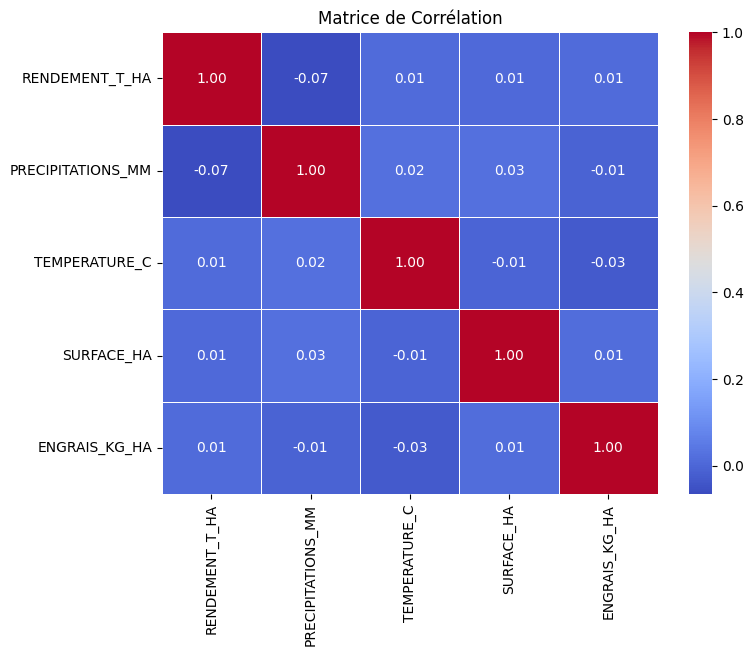

In [72]:
# Calcul de la matrice de corrélation pour les variables numériques
correlation_matrix = data[['RENDEMENT_T_HA', 'PRECIPITATIONS_MM', 'TEMPERATURE_C', 'SURFACE_HA', 'ENGRAIS_KG_HA']].corr()

# Affichage de la matrice de corrélation
print(correlation_matrix)

# Visualisation de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()
